In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
!pip install statsmodels
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [16]:
#load the dataset
url = 'https://raw.githubusercontent.com/gaurav15raj/Time_Series-Econs-/main/AR%20Processes/output.csv'
df = pd.read_csv(url)
df

,Unnamed: 0,Date,Prices
0,0,2022-01-01,99.346617
1,1,2022-01-02,99.563825
2,2,2022-01-03,100.163220
3,3,2022-01-04,99.841533
4,4,2022-01-05,101.927683
...,...,...,...
360,360,2022-12-27,100.584309
361,361,2022-12-28,100.727467
362,362,2022-12-29,100.187050
363,363,2022-12-30,97.957102


In [17]:
df['Date'] = pd.to_datetime(df.Date)

In [18]:
#plot the acf and pacf 

df.set_index('Date', inplace=True)
df['Prices']=(df['Prices']-df['Prices'].mean())/df['Prices'].std()
df.drop(columns=('Unnamed: 0'),inplace=True)
df

,Prices
Date,
2022-01-01,-0.482230
2022-01-02,-0.327243
2022-01-03,0.100451
2022-01-04,-0.129087
2022-01-05,1.359470
...,...
2022-12-27,0.400915
2022-12-28,0.503065
2022-12-29,0.117454


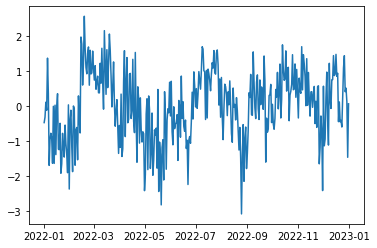

In [19]:
plt.plot(df)

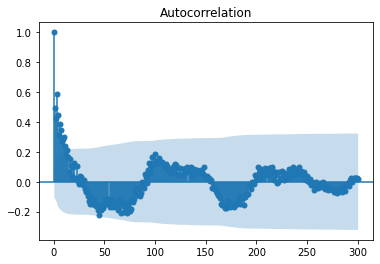

In [25]:
acf_plot = plot_acf(df,lags=300)

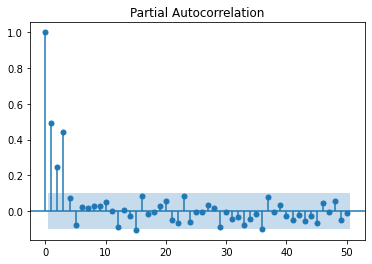

In [26]:
pacf_plot = plot_pacf(df,lags=50)

In [27]:
#it looks like an AR Process of order x, so we will train our regression till x lags 
#x=3
#use the df.shift function to get a lag of 1,2....x
df['Prices2']=df['Prices'].shift(-1, axis = 0)
df['Prices3']=df['Prices'].shift(-2, axis = 0)
df['Prices4']=df['Prices'].shift(-3, axis = 0)
df=df.dropna()
df

,Prices,Prices2,Prices3,Prices4
Date,,,,
2022-01-01,-0.482230,-0.327243,0.100451,-0.129087
2022-01-02,-0.327243,0.100451,-0.129087,1.359470
2022-01-03,0.100451,-0.129087,1.359470,0.341540
2022-01-04,-0.129087,1.359470,0.341540,-1.705199
2022-01-05,1.359470,0.341540,-1.705199,-0.971772
...,...,...,...,...
2022-12-24,0.186518,1.081561,1.429433,0.400915
2022-12-25,1.081561,1.429433,0.400915,0.503065
2022-12-26,1.429433,0.400915,0.503065,0.117454


In [30]:
#perform data cleaning and define dependent and independent variables
# prices > dependent 
# prices2,prices3,prices4 > independent variable

x=df[['Prices2','Prices3','Prices4']]
y=df['Prices']

In [31]:
#define train and test data 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2,random_state=64)

In [37]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.4761134725941899

# R2 of 47% means a bit weak correlation between dependent and independents.

In [56]:
data = df['Prices']
test_set_size = int(len(df)*0.2)
train_set, test_set = data[:-test_set_size], data[-test_set_size:]

print(data.shape) 
print(train_set.shape)
print(test_set.shape)

(362,)
(290,)
(72,)


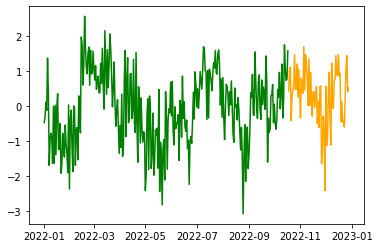

In [53]:
train_set_size = len(data) - TEST_SET_SIZE
train_set_dates = df.head(train_set_size).index  # for plotting
test_set_dates = df.tail(TEST_SET_SIZE).index  

plt.plot(train_set_dates, train_set, color='green')
plt.plot(test_set_dates, test_set, color='orange')
plt.show()

In [40]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train_set, lags=100)  # use time span of 1 year for lagging
trained_model = model.fit()

C:\Users\krutu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\krutu\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [41]:
from sklearn.metrics import mean_squared_error as mse

predictions = trained_model.predict(start=train_set_size, 
                                    end=train_set_size + TEST_SET_SIZE - 1)

error = mse(test_set, predictions)

print(f'test MSE: {error:.3}')
print(f'test RMSE: {error ** 0.5:.3}')

test MSE: 1.04
test RMSE: 1.02


C:\Users\krutu\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


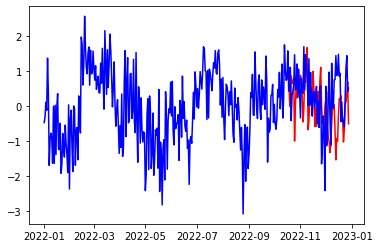

In [52]:
plt.plot(test_set_dates, predictions, color='red')
plt.plot(df.index, df.Prices, color='blue' )